In [ ]:
%pip install anndata decoupler scanpy omnipath igraph liana adjustText


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import liana as ln
liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)
# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]
# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']
# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1
# Find duplicated rows
duplicates = liana_lr.duplicated()
# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

In [ ]:
## IMPORTS
import numpy as np
import pandas as pd
import scanpy as sc
import adjustText

import decoupler as dc

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import networkx as nx
import random

sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))


In [ ]:
t_data = pd.read_csv("/OMICS_DATA_RAW/transcriptomics_degs_raw.csv")
#m_data = pd.read_csv("/workspaces/env/AFTER_PY/metabolic_input_editedit.csv")
#ph_data = pd.read_csv("/workspaces/env/ph_site_adjpval.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/OMICS_DATA_RAW/transcriptomics_degs_raw.csv'

In [ ]:
t_data.head(10)

,gene,l2fc
0,SUN2,2.570000e-07
1,FCN3,5.679165e-01
2,SLCO4A1,3.468157e-03
3,PALLD,3.990000e-05
4,PPP3CC,4.398002e-02
5,FNDC1,5.643102e-01
6,CPM,2.336379e-02
7,IL1RL1,1.484015e-03
8,CD163,8.469744e-02
9,RPGR,4.435629e-03


,HMDB_ID,value
0,HMDB0000050,-1
1,HMDB0000161,0
2,HMDB0062186,0
3,HMDB0000191,0
4,HMDB0000039,-1
5,HMDB0000094,0
6,HMDB0000562,0
7,HMDB0000574,0
8,HMDB0032357,1
9,HMDB0062538,-1


In [ ]:
ph_data.drop(columns=['Unnamed: 0'], inplace=True)
ph_data.head(10)

In [ ]:
proteom = pd.read_csv("/workspaces/env/OMICS_DATA_RAW/proteomics_intensities_raw.csv")
proteome = proteom[['Protein.name','Gene','adj.p.value']].copy()
proteome.drop(columns=['Gene'], inplace=True)
proteome.rename(columns={'Protein.name':'prot'}, inplace=True)
p_data = proteome.copy()

In [ ]:
p_data.head(10)

,prot,adj.p.value
0,A0A087WV05,0.733988
1,A0A096LPI6,0.373333
2,A0A0B4J203,0.702665
3,A0A0G2JRQ6,0.469693
4,A0A0J9YY99,0.565275
5,A0A1B0GVF1,0.783171
6,A0A1W2PNV4,0.121170
7,A0A1W2PQ90,0.822214
8,A0A2R8Y7X9,0.827501
9,A0A2R8YDQ0,0.231467


In [ ]:

df = pd.read_csv("/workspaces/env/OMICS_DATA_RAW/transcriptomics_degs_raw.csv")
df.set_index(['external_gene_name'],inplace=True)


In [ ]:
df2 = df[['padj.pef', 'l2fc.pef']].copy()
df2

,padj.pef,l2fc.pef
external_gene_name,,
SUN2,1.790000e-130,-1.143803
FCN3,6.490000e-95,-3.498162
SLCO4A1,1.510000e-92,-3.770041
PALLD,1.540000e-79,-1.182888
PPP3CC,1.510000e-77,-0.791724
...,...,...
AGTRAP,9.992984e-01,-0.000116
AC067852.2,9.996489e-01,0.000033
AC102953.2,9.997016e-01,-0.000060


In [ ]:
pdf = df2[['padj.pef']].copy()
l2fc = df2[['l2fc.pef']].copy()
cntrl = df[['control_median']].copy()


# Extract logFCs and pvals
logFCs = df2[['l2fc.pef']].T.rename(index={'l2fc.pef': 'contrast'})
pvals = df2[['padj.pef']].T.rename(index={'padj.pef': 'contrast'})

In [ ]:
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13285 entries, SUN2 to WHAMMP3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   padj.pef  13285 non-null  float64
 1   l2fc.pef  13285 non-null  float64
dtypes: float64(2)
memory usage: 311.4+ KB


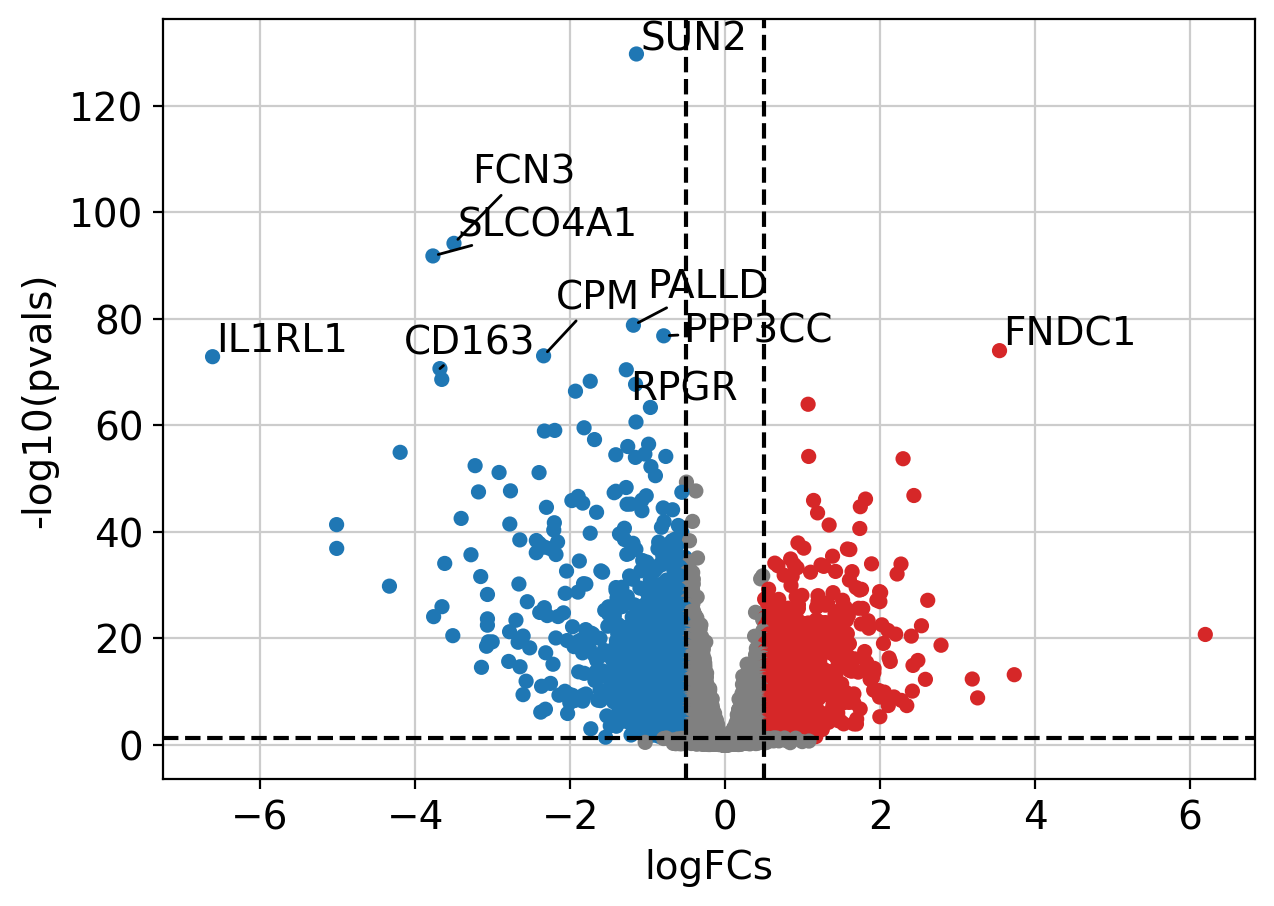

In [ ]:



dc.plot_volcano_df(
 df2,
 x='l2fc.pef',
 y='padj.pef',
 top=10
)

In [ ]:



# Retrieve CollecTRI gene regulatory network
collectri = dc.get_collectri(organism='human', split_complexes=False)

/usr/local/python/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
t_data.set_index(['gene'], inplace=True)
print(t_data.head(10))

                 l2fc
gene                 
SUN2     2.570000e-07
FCN3     5.679165e-01
SLCO4A1  3.468157e-03
PALLD    3.990000e-05
PPP3CC   4.398002e-02
FNDC1    5.643102e-01
CPM      2.336379e-02
IL1RL1   1.484015e-03
CD163    8.469744e-02
RPGR     4.435629e-03


In [ ]:
t_data_T = t_data.T

In [ ]:
t_data_T

gene,SUN2,FCN3,SLCO4A1,PALLD,PPP3CC,FNDC1,CPM,IL1RL1,CD163,RPGR,...,FAHD2B,SKAP2,KLHL28,RPP14,FXYD5,VLDLR-AS1,AC067852.2,AC102953.2,CCDC97,WHAMMP3
l2fc,2.570000e-07,0.567917,0.003468,0.00004,0.04398,0.56431,0.023364,0.001484,0.084697,0.004436,...,0.033536,0.000326,0.0251,0.984241,0.378062,0.025471,0.242111,0.660867,0.193536,0.000215


In [ ]:





tf_acts, tf_pvals = dc.run_ulm(mat=t_data_T,
                               net=collectri,
                               verbose=True
                               )

4 features of mat are empty, they will be removed.
Running ulm on mat with 1 samples and 12082 targets for 611 sources.


In [ ]:
tf_acts.head(10).T

,l2fc
ABL1,-0.496747
AHR,0.210604
AIRE,-0.880263
AP1,-1.761116
APEX1,-1.384164
...,...
ZNF436,-0.758993
ZNF699,-1.412221
ZNF76,-0.311025
ZNF804A,0.540177


In [ ]:
tf_pvals.head(10).T

,l2fc
ABL1,0.619376
AHR,0.833200
AIRE,0.378734
AP1,0.078244
APEX1,0.166334
...,...
ZNF436,0.447871
ZNF699,0.157911
ZNF76,0.755787
ZNF804A,0.589085


In [ ]:
tf_pvals_horizontal = tf_pvals.T
tf_pvals_horizontal.head(10)

,l2fc
ABL1,0.619376
AHR,0.833200
AIRE,0.378734
AP1,0.078244
APEX1,0.166334
AR,0.203524
ARID1A,0.265462
ARID3B,0.148058
ARID5B,0.399184
ARNT,0.122322


In [ ]:
tf_pvals_horizontal.shape

(611, 1)

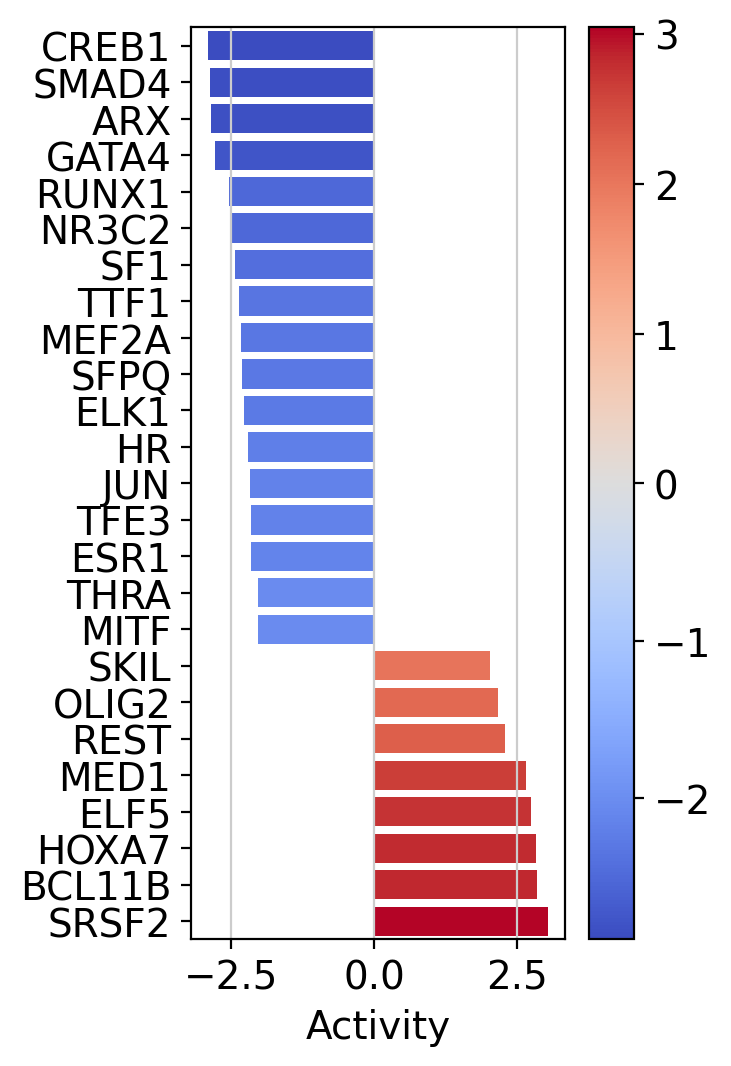

In [ ]:
# ploting the obtained scores
# for the top active/inactive transcription factors:

dc.plot_barplot(
 acts=tf_acts,
 contrast='l2fc',
 top=25,
 vertical=True,
 figsize=(3, 6)
)

In [ ]:
# # Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=t_data_T, net=progeny, verbose=True)



4 features of mat are empty, they will be removed.
Running mlm on mat with 1 samples and 12082 targets for 14 sources.


In [ ]:
pathway_acts.head(10).T

,l2fc
Androgen,0.809336
EGFR,0.091910
Estrogen,-0.954368
Hypoxia,1.325208
JAK-STAT,3.896479
MAPK,-1.533721
NFkB,0.059030
PI3K,0.333385
TGFb,-1.293839
TNFa,-0.313965


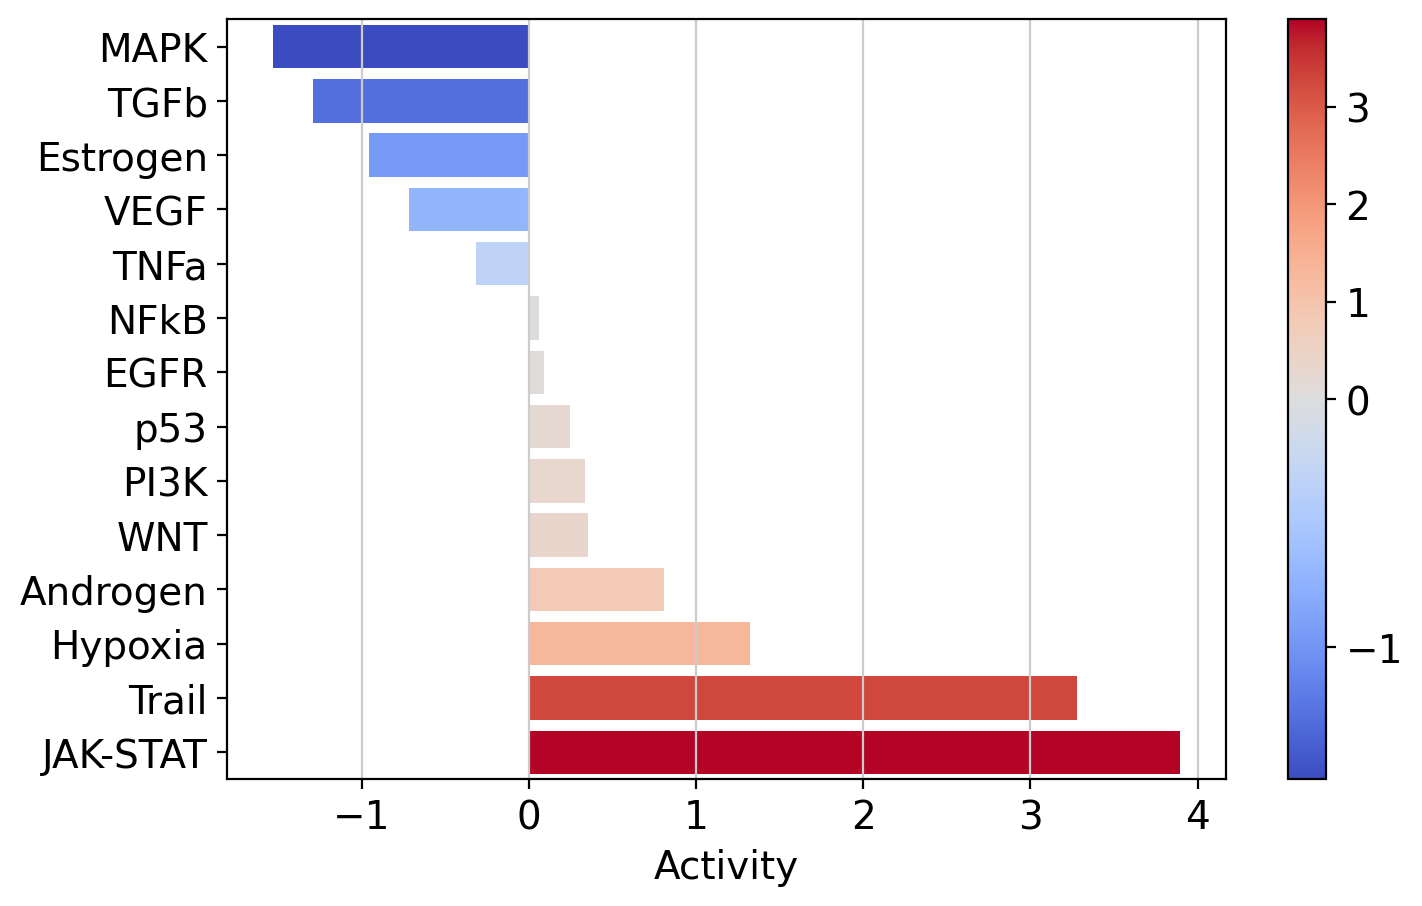

In [ ]:
dc.plot_barplot(
 pathway_acts,
 'l2fc',
 top=25,
 vertical=True,
 figsize=(8, 5)
)

In [ ]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to differ
msigdb = dc.get_resource('MSigDB')

In [ ]:
msigdb = msigdb[msigdb['collection']=='hallmark']
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

/tmp/ipykernel_2817/4036192829.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['IL2_STAT5_SIGNALING', 'COAGULATION', 'HYPOXIA', 'TNFA_SIGNALING_VIA_NFKB', 'COMPLEMENT', 'HYPOXIA', 'P53_PATHWAY', 'TNFA_SIGNALING_VIA_NFKB', 'GLYCOLYSIS', 'APOPTOSIS', 'IL2_STAT5_SIGNALING', 'TNFA_SIGNALING_VIA_NFKB', 'TNFA_SIGNALING_VIA_NFKB', 'EPITHELIAL_MESENCHYMAL_TRANSITION', 'IL2_STAT5_SIGNALING', 'TNFA_SIGNALING_VIA_NFKB', 'TNFA_SIGNALING_VIA_NFKB', 'PROTEIN_SECRETION', 'ADIPOGENESIS', 'BILE_ACID_METABOLISM', 'INFLAMMATORY_RESPONSE', 'INFLAMMATORY_RESPONSE', 'TNFA_SIGNALING_VIA_NFKB', 'UNFOLDED_PROTEIN_RESPONSE', 'TNFA_SIGNALING_VIA_NFKB', 'IL2_STAT5_SIGNALING', 'P53_PATHWAY', 'TNFA_SIGNALING_VIA_NFKB', 'TGF_BETA_SIGNALING', 'KRAS_SIGNALING_UP', 'UV_RESPONSE_UP', 'APOPTOSIS', 'TNFA_SIGNALING_VIA_NFKB', 'APOPTOSIS', 'ALLOGRAFT_REJECTION', 'INTERFERON_GAMMA_RESPONSE', 'INTERFERON_ALPHA_RESPONSE', 'TNFA_SIGNALING_VIA_NFKB', 'I

## Enrichment with Over Representation Analysis (ORA)
To infer functional enrichment scores we will run the Over Representation Analysis (ora) method. As input data it accepts an expression matrix
(decoupler.run_ora) or the results of differential expression analysis (decoupler.run_ora_df). For the former, by default the top 5% of
expressed genes by sample are selected as the set of interest (S), and for the latter a user-defined significance filtering can be used. Once
we have S, it builds a contingency table using set operations for each set stored in the gene set resource being used (net). Using the
contingency table, ora performs a one-sided Fisher exact test to test for significance of overlap between sets. The final score is obtained by
log-transforming the obtained p-values, meaning that higher values are more significant

In [ ]:
top_genes = df2[df2['padj.pef'] < 0.05]


# Run ora
enr_pvals = dc.get_ora_df(
 df=top_genes,
 net=msigdb,
 source='geneset',
 target='genesymbol'
)


In [ ]:
enr_pvals.head(10)

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,ADIPOGENESIS,200,0.670000,3.241386e-11,8.103465e-10,1.535475,37.085469,ABCA1;ABCB8;ACAA2;ACADM;ACLY;ACOX1;ADIPOR2;AGP...
1,ALLOGRAFT_REJECTION,200,0.395000,9.099058e-01,9.679849e-01,0.901852,0.085148,AARS1;ABCE1;ACVR2A;AKT1;APBB1;B2M;BCAT1;BCL10;...
2,ANDROGEN_RESPONSE,100,0.690000,3.391983e-07,1.884435e-06,1.579030,23.522308,ABCC4;ABHD2;ACSL3;ACTN1;ADAMTS1;ADRM1;AKAP12;A...
3,ANGIOGENESIS,36,0.694444,1.746910e-03,3.011914e-03,1.592306,10.110993,APP;CCND2;COL3A1;COL5A2;FGFR1;FSTL1;ITGAV;JAG1...
4,APICAL_JUNCTION,200,0.580000,4.023883e-05,1.183495e-04,1.327223,13.432392,ACTA1;ACTB;ACTN1;ACTN2;ACTN4;ADAM15;ADAM9;ADAM...
5,APICAL_SURFACE,44,0.454545,4.763350e-01,5.177554e-01,1.048941,0.777930,ADAM10;ADIPOR2;AKAP7;APP;B4GALT1;CROCC;CX3CL1;...
6,APOPTOSIS,161,0.602484,2.112856e-05,6.602675e-05,1.378694,14.841486,ADD1;ANKH;ANXA1;APP;ATF3;BCAP31;BCL10;BCL2L1;B...
7,BILE_ACID_METABOLISM,112,0.517857,5.675925e-02,7.468322e-02,1.185128,3.400057,ABCA1;ABCD1;ABCD3;ACSL1;ACSL5;ALDH1A1;ALDH9A1;...
8,CHOLESTEROL_HOMEOSTASIS,74,0.594595,5.072389e-03,7.925607e-03,1.361753,7.195428,ALCAM;ALDOC;ANXA5;ATF3;ATF5;CD9;CHKA;CLU;CPEB2...
9,COAGULATION,138,0.514493,4.477500e-02,6.050676e-02,1.176786,3.655222,A2M;ACOX2;ADAM9;ANXA1;APOA1;C1QA;C1R;C1S;C3;CA...


/tmp/ipykernel_2817/155147382.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


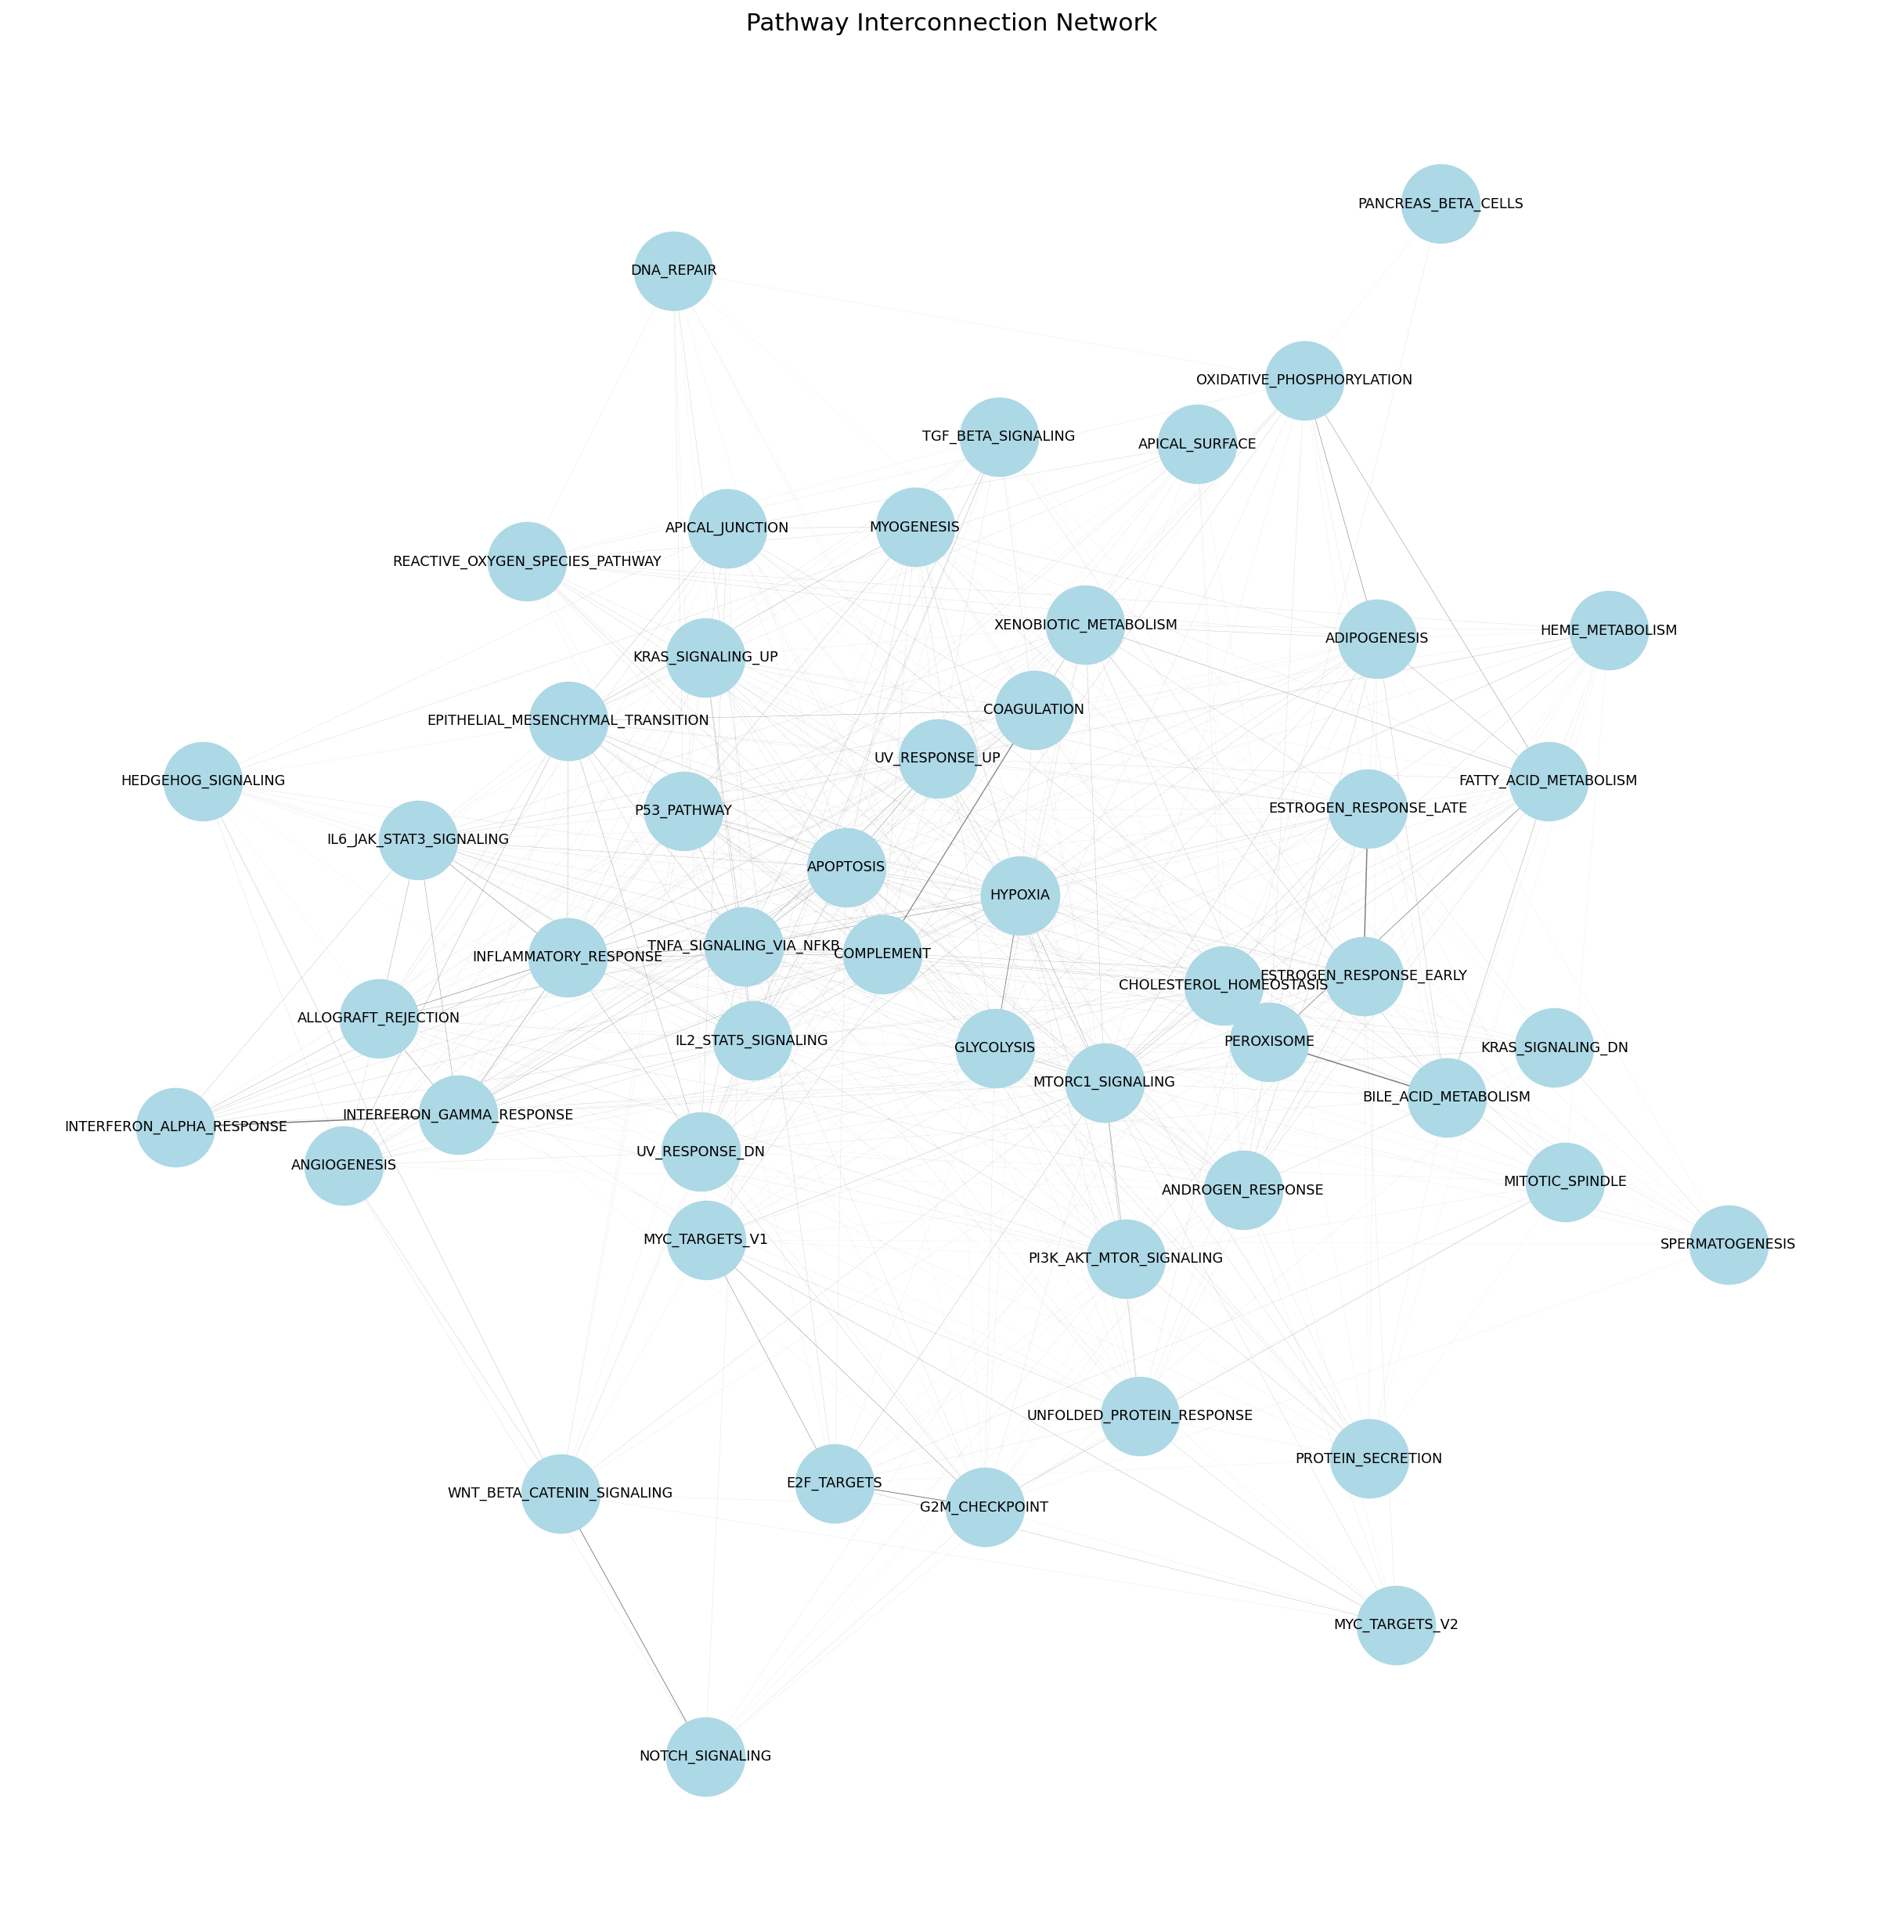

In [ ]:

def plot_pathway_network(df, threshold=0.01):
    gene_sets = {}
    for index, row in df.iterrows():
        gene_sets[row['Term']] = row['Features'].split(';')

    # Calculate Jaccard similarity between gene sets
    similarity_matrix = np.zeros((len(gene_sets), len(gene_sets)))
    for i, (set1_name, set1_genes) in enumerate(gene_sets.items()):
        for j, (set2_name, set2_genes) in enumerate(gene_sets.items()):
            if i != j:
                intersection = len(set(set1_genes).intersection(set2_genes))
                union = len(set(set1_genes).union(set2_genes))
                similarity_matrix[i, j] = intersection / union

    # Create a network graph
    G = nx.Graph()
    for i, set1_name in enumerate(gene_sets):
        for j, set2_name in enumerate(gene_sets):
            if i != j and similarity_matrix[i, j] >= threshold:
                G.add_edge(set1_name, set2_name, weight=similarity_matrix[i, j])

    # Plot the network graph using Fruchterman-Reingold layout
    plt.figure(figsize=(15, 15))
    pos = nx.fruchterman_reingold_layout(G, k=0.8, iterations=100)  #
    edge_weights = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=8, node_color='lightblue',
            edge_color='gray', width=[w * 2 for w in edge_weights.values()])
    plt.title("Pathway Interconnection Network")
    plt.tight_layout()
    plt.savefig("pathway_net.png")
plot_pathway_network(df, 0.01)

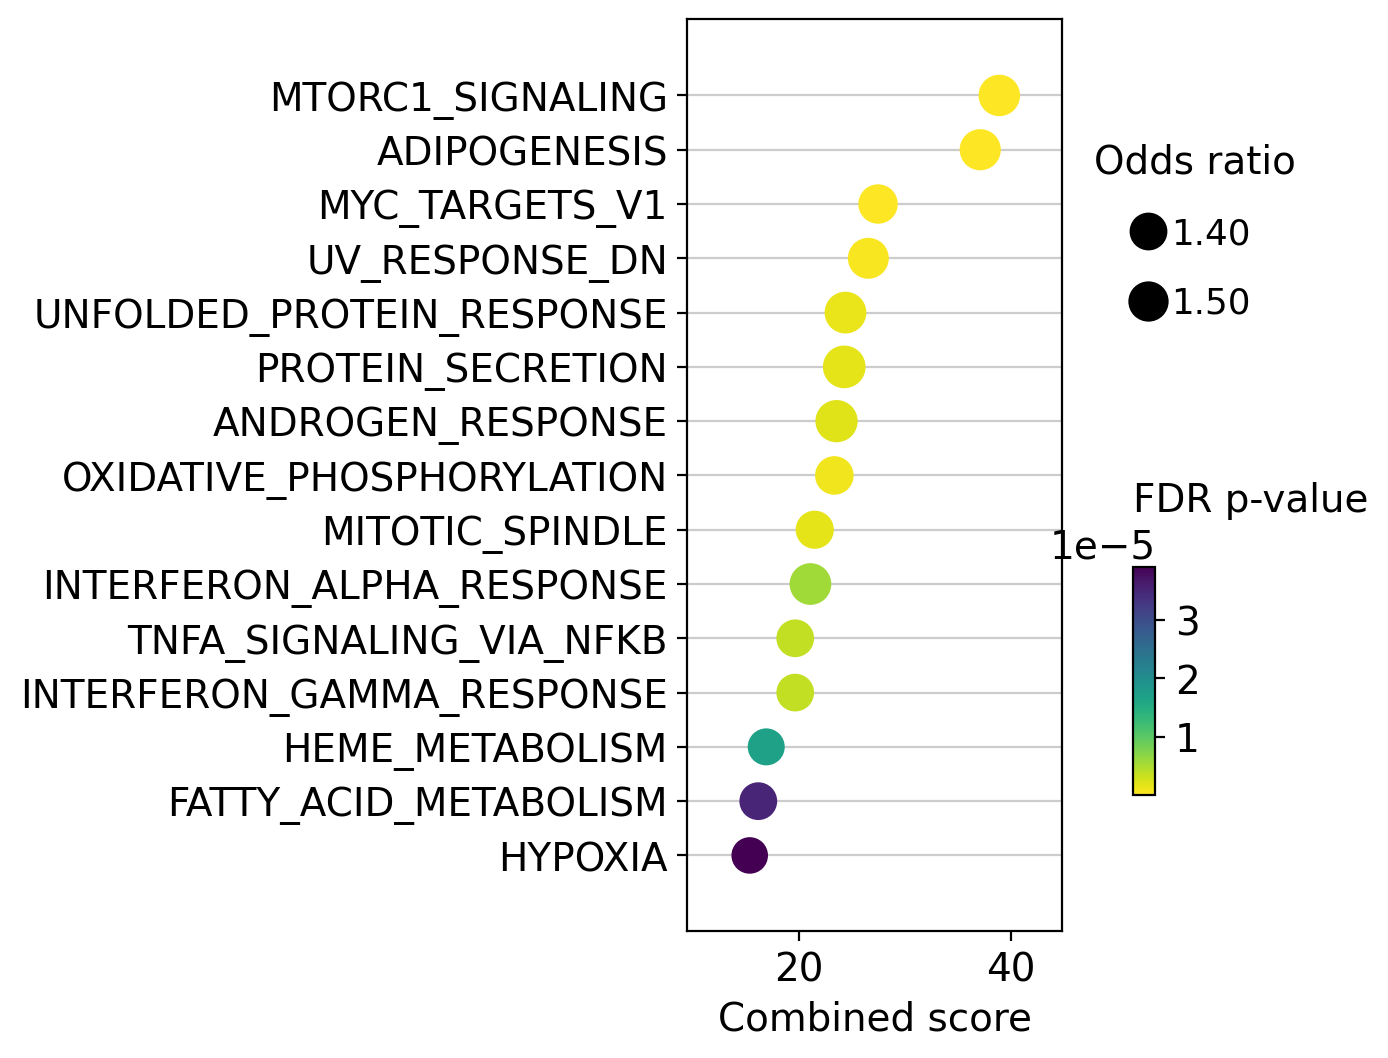

In [ ]:
# Visualization
dc.plot_dotplot(
 enr_pvals.sort_values('Combined score', ascending=False).head(15),
 x='Combined score',
 y='Term',
 s='Odds ratio',
 c='FDR p-value',
 scale=1.5,
 figsize=(3, 6)
)

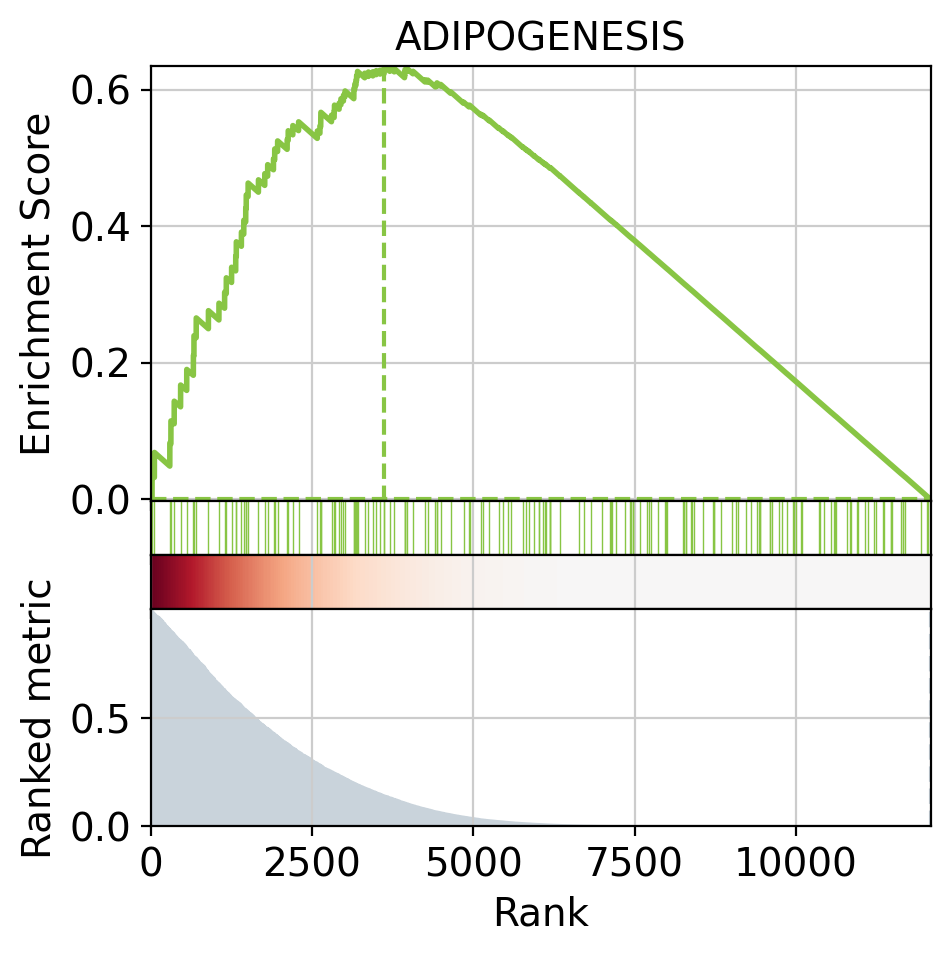

In [ ]:




# Plot
dc.plot_running_score(
    df=t_data,
    net=msigdb,
    stat= "l2fc",
    source='geneset',
    target='genesymbol',
    set_name='ADIPOGENESIS'
)

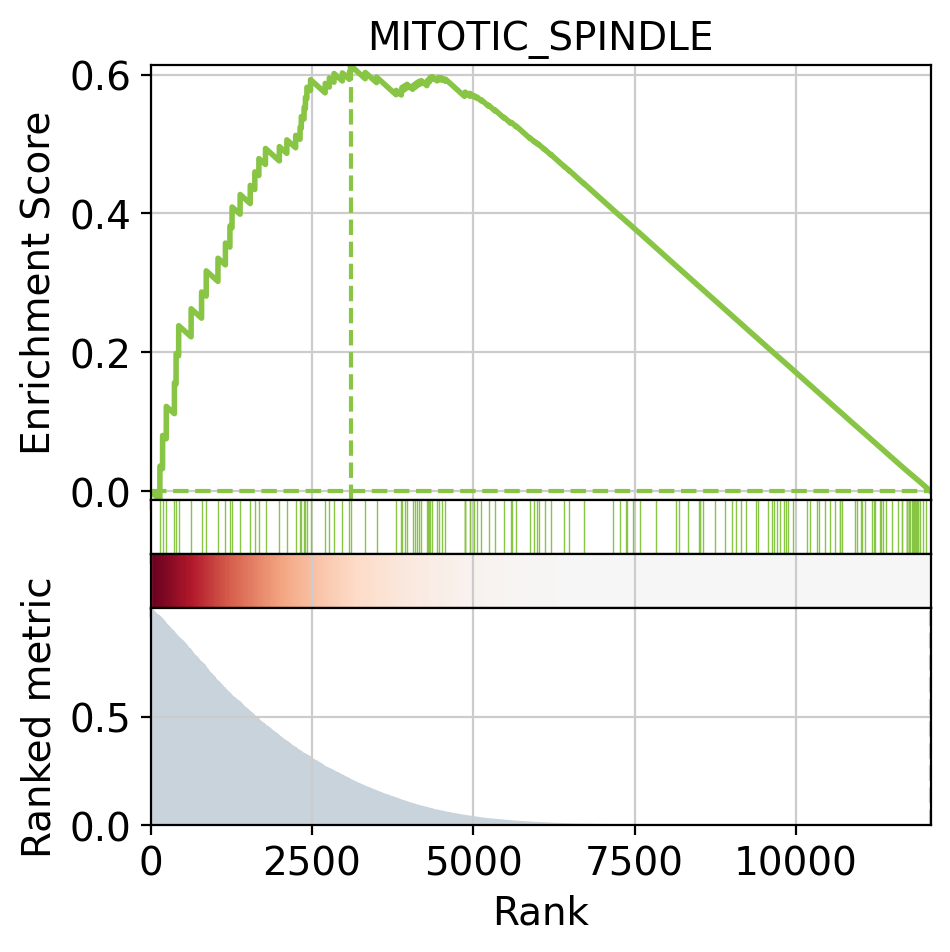

In [ ]:




# Plot
dc.plot_running_score(
    df=t_data,
    net=msigdb,
    stat= "l2fc",
    source='geneset',
    target='genesymbol',
    set_name='MITOTIC_SPINDLE'
)

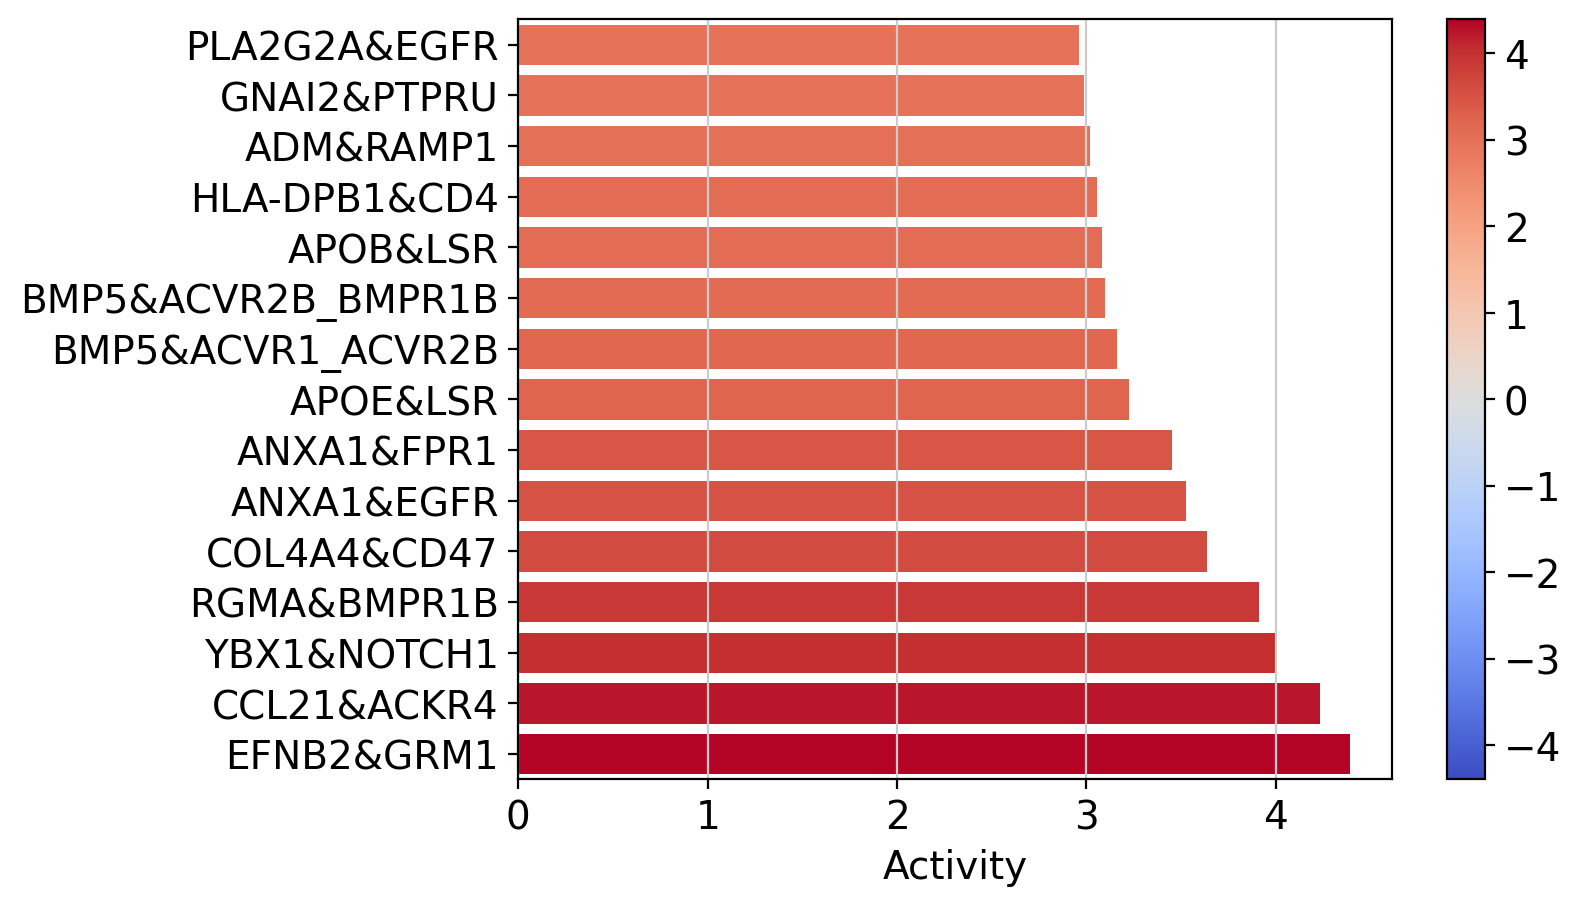

In [ ]:


# Then we can use again ulm to find the significant co-regulated pairs of ligand and receptors.
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
 mat=t_data_T,
 net=liana_lr,
 source='interaction',
 target='genes',
 min_n=2,
 verbose=True
)


dc.plot_barplot(lr_score, 'l2fc', top=15, vertical=True)